With a pre constructed boundary files and magnetic field files generated in COMSOL in we are well prepared to use them in unison to simulate a ferromagnetic object in an NLC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, IntSlider

To run openQmin from the command line with everything you've got together you would enter:

-i (iterations needed) --LX 240 --Ly 240 --Lz 28 --deltaT 0.001 -z 2 --hFieldY (field in ND) -- boundaryFile (filename) --spatiallyVaryingFieldFile (filename) saveFile (filename)

Thanks again to the creators of openQmin for making the spatiallyVaryingFieldFile option possible for me to use!

In [2]:
def director_qmin_color(string, dimx, dimy, dimz):
    data = np.loadtxt(string, delimiter='	', converters=None, skiprows=0, usecols = (3,4,5,6,7))
    Qxx = data[:,0]
    Qxy = data[:,1]
    Qxz = data[:,2]
    Qyy = data[:,3]
    Qyz = data[:,4]
    Qmat = np.moveaxis(np.array([
                [Qxx, Qxy, Qxz],
                [Qxy, Qyy, Qyz],
                [Qxz, Qyz, -Qxx-Qyy]
                ]), -1, 0)
    evals, evecs = np.linalg.eigh(Qmat)
    n = (evecs[:,:,2])
    
    nx = n[:,0]
    ny = n[:,1]
    nz = n[:,2]
    
    
    color_ny_nx = np.absolute(np.arctan(ny/nx))
    color_nz_ny = np.absolute(np.arctan(nz/ny))

    color_ny_nx = np.reshape(color_ny_nx, (dimx,dimy,dimz), order='F')
    color_nz_ny = np.reshape(color_nz_ny, (dimx,dimy,dimz), order='F')
    nx = np.reshape(nx, (dimx,dimy,dimz), order='F')
    ny = np.reshape(ny, (dimx,dimy,dimz), order='F')
    nz = np.reshape(nz, (dimx,dimy,dimz), order='F')
    return(nx,ny,nz,color_ny_nx,color_nz_ny)

In [3]:
dimx = 240
dimy = 240
dimz = 28

l = 40
w = 40
h = 20

mid_x = mid_y = 120
mid_z = 14

In [4]:
init_string = st = 'data_open_Qmin/cuboid/cuboid_240_240_28_39_39_19_H'

#define file path for data
fp_0 = st + '_0_x0y0z0.txt'
fp_1 = st + '_50000000_x0y0z0.txt'
fp_2 = st + '_55000000_x0y0z0.txt'
fp_3 = st + '_60000000_x0y0z0.txt'

H_0_nx, H_0_ny, H_0_nz, H_0_c_ny_nx, H_0_c_nz_ny = director_qmin_color(fp_0,dimx,dimy,dimz)
H_1_nx, H_1_ny, H_1_nz, H_1_c_ny_nx, H_1_c_nz_ny = director_qmin_color(fp_1,dimx,dimy,dimz)
H_2_nx, H_2_ny, H_2_nz, H_2_c_ny_nx, H_2_c_nz_ny = director_qmin_color(fp_2,dimx,dimy,dimz)
H_3_nx, H_3_ny, H_3_nz, H_3_c_ny_nx, H_3_c_nz_ny = director_qmin_color(fp_3,dimx,dimy,dimz)



/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_25934/2280039487.py:21: RuntimeWarning: divide by zero encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_25934/2280039487.py:21: RuntimeWarning: invalid value encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_25934/2280039487.py:22: RuntimeWarning: divide by zero encountered in divide
  color_nz_ny = np.absolute(np.arctan(nz/ny))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_25934/2280039487.py:22: RuntimeWarning: invalid value encountered in divide
  color_nz_ny = np.absolute(np.arctan(nz/ny))


In [5]:
def plot_quiver_x_y(H_x, H_y, mid_z=None, k_x_y=8, scale=40, width=0.008, headaxislength=0, headlength=0, headwidth=0.1, cmap='magma', title='Vector Field Plot'):
    if mid_z is None:
        mid_z = H_y.shape[2] // 2
    
    plt.figure(figsize=(6, 6))

    rect0 = plt.Rectangle((100, 100), 40, 40, linewidth=1.5, edgecolor='black', facecolor='lightgrey')
    plt.imshow(np.abs(H_y[:, :, mid_z]), cmap=cmap, alpha=0.6)
    cbar = plt.colorbar()

    x, y = np.meshgrid(np.arange(H_y.shape[1]), np.arange(H_y.shape[0]))
    plt.quiver(x[::k_x_y, ::k_x_y], y[::k_x_y, ::k_x_y], H_y[::k_x_y, ::k_x_y, mid_z], H_x[::k_x_y, ::k_x_y, mid_z],
               pivot='middle', scale=scale, width=width, headaxislength=headaxislength, headlength=headlength, headwidth=headwidth, linewidths=width)

    plt.gca().add_patch(rect0)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    cbar.set_label('n_along_field')

    plt.show()

In [6]:
# Define the list of datasets and titles
H_list = [
    (H_0_nx, H_0_ny, H_0_nz, 'H = 0 A/m = 0 ND'),
    (H_1_nx, H_1_ny, H_1_nz, 'H = 50000000 A/m = 0 ND'),
    (H_2_nx, H_2_ny, H_2_nz, 'H = 55000000 A/m = 0 ND'),
    (H_3_nx, H_3_ny, H_3_nz, 'H = 60000000 A/m = 0 ND')
]

In [7]:
# Interactive plot function
def interactive_quiver(index):
    H_nx, H_ny, H_nz, H_title = H_list[index]
    plot_quiver_x_y(H_nx, H_ny, title=H_title)

# Create an interactive slider to scroll through the plots
interact(interactive_quiver, index=IntSlider(min=0, max=len(H_list)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=3), Output()), _dom_classes=('widget-interac…

<function __main__.interactive_quiver(index)>

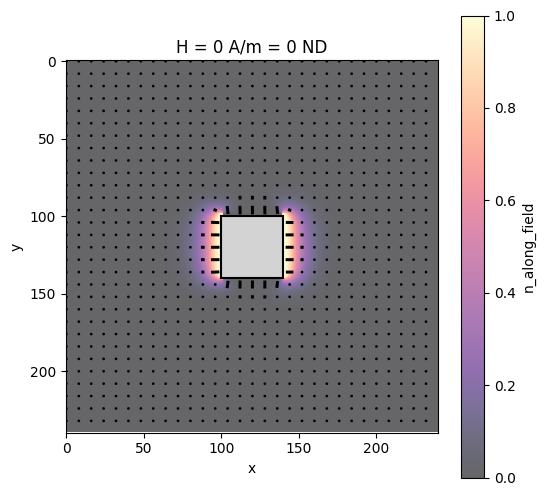

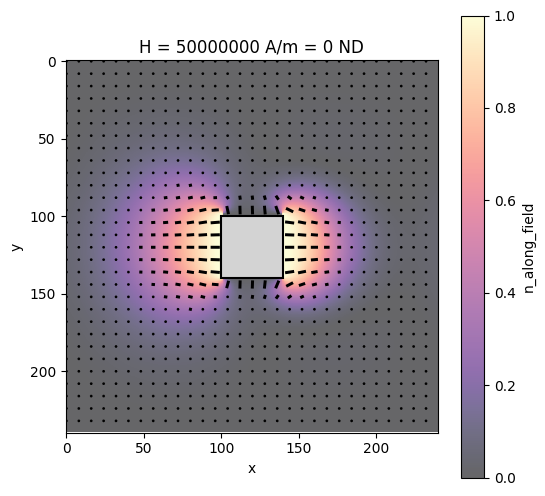

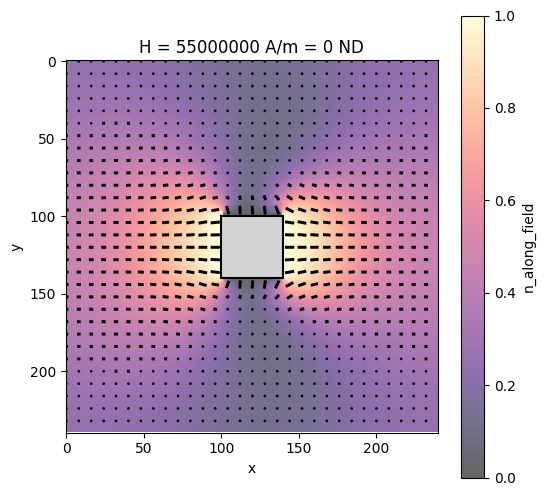

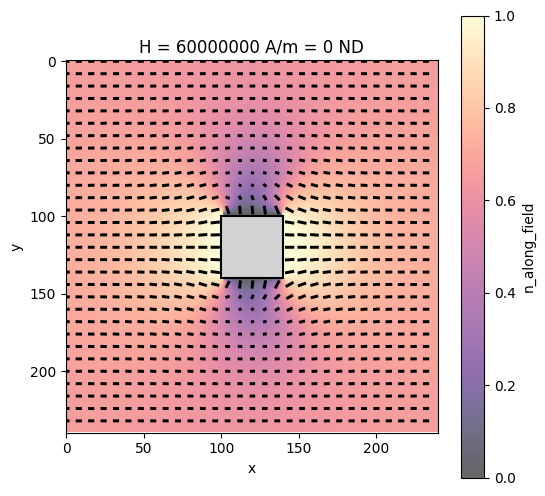

In [8]:
# Plot each dataset
for H_x, H_y, H_z, title in H_list:
    plot_quiver_x_y(H_x, H_y, title=title)

In [9]:
def plot_quiver_y_z(H_ny, H_nz, k_z=4, scale=80, width=0.003, headaxislength=0, headlength=0, headwidth=0, cmap='magma', title='Vector Field Plot'):
    plt.figure(figsize=(6, 6))

    # Plot the image of the field
    rect0 = plt.Rectangle((100, 4), 40, 20, linewidth=0.5, edgecolor='black', facecolor='lightgrey')
    plt.imshow(np.abs(H_ny[mid_x, :, :].T), cmap=cmap, alpha=0.6)
    cbar = plt.colorbar()

    # Create meshgrid for quiver plot
    z_indices, y_indices = np.meshgrid(np.arange(0, H_ny.shape[2], k_z), np.arange(0, H_ny.shape[1], k_z), indexing='ij')

    y_flat = y_indices.flatten()
    z_flat = z_indices.flatten()

    # Plot the quiver plot
    plt.quiver(y_flat, z_flat, H_ny[mid_x, ::k_z, ::k_z].T.flatten(), H_nz[mid_x, ::k_z, ::k_z].T.flatten(), 
               pivot='middle', scale=scale, width=width, headaxislength=headaxislength, headlength=headlength, headwidth=headwidth)

    plt.gca().add_patch(rect0)
    plt.xlim(35, 205)
    plt.ylim(1, 27)

    plt.title(title)
    plt.xlabel('y')
    plt.ylabel('z')
    cbar.set_label('n_along_field')

    plt.show()

In [11]:
# Interactive plot function
def interactive_quiver(index):
    H_nx, H_ny, H_nz, H_title = H_list[index]
    plot_quiver_y_z(H_ny, H_nz, title=H_title)

# Create an interactive slider to scroll through the plots
interact(interactive_quiver, index=IntSlider(min=0, max=len(H_list)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=3), Output()), _dom_classes=('widget-interac…

<function __main__.interactive_quiver(index)>

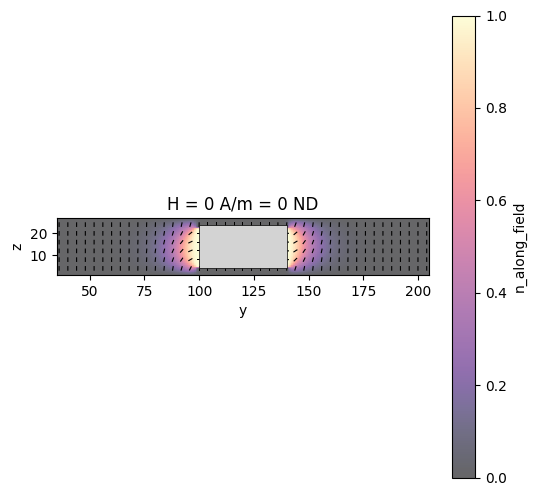

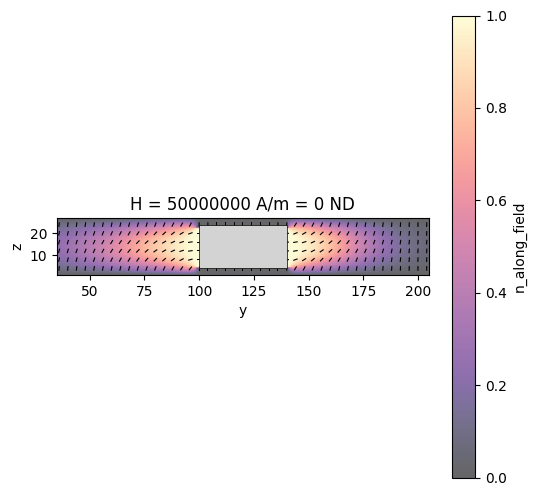

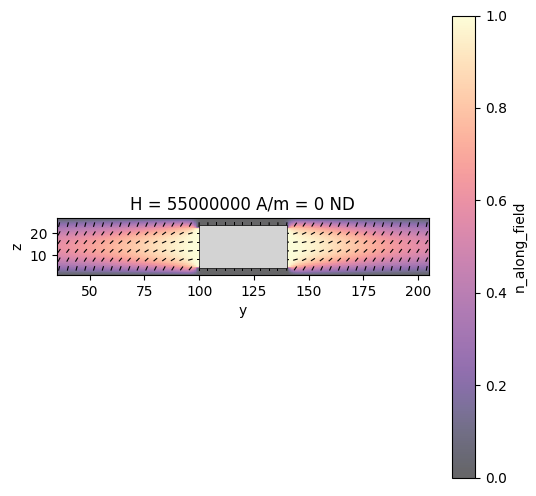

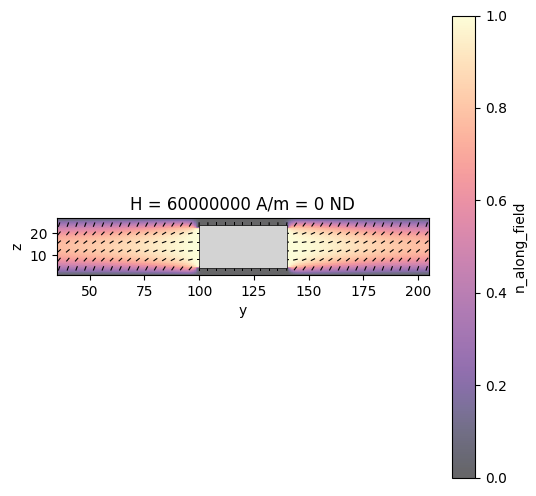

In [12]:
# Plot each dataset
for H_x, H_y, H_z, title in H_list:
    plot_quiver_y_z(H_y, H_z, title=title)